In [36]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [53]:
# Load data into a Pandas DataFrame
data = pd.read_csv("hw04_data.csv")

# select all rows, columns 0 and 1
X = data.iloc[:, 0:2].values
# select all rows, column 2
y = data.iloc[:, 2].values


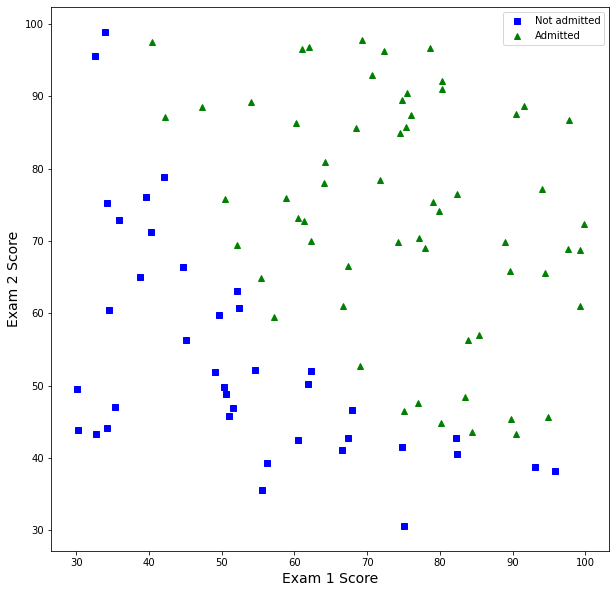

In [54]:
plt.figure(figsize=(10, 10))

# Plot the data for the “Not admitted” entries
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label = "Not admitted")
# Plot the data for the “Admitted” entries with the style of green triangles.

plt.plot(X[y==1, 0], X[y==1, 1], "g^", label = "Admitted")
plt.legend(loc="best")
# Add labels for the coordinates
plt.xlabel("Exam 1 Score", fontsize=14)
plt.ylabel("Exam 2 Score", fontsize=14)
plt.show()

# Logistic Regression model

Splitting the dataset into the Training set (80%) and Test set (20%)

In [39]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split data into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [40]:
# Import the LogisticRegression
from sklearn.linear_model import LogisticRegression

# Initialize LogisticRegression with lbfgs solver
log_reg = LogisticRegression(solver='lbfgs', random_state=42, C=1.5)

# Fit the training data to the model
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.5, random_state=42)

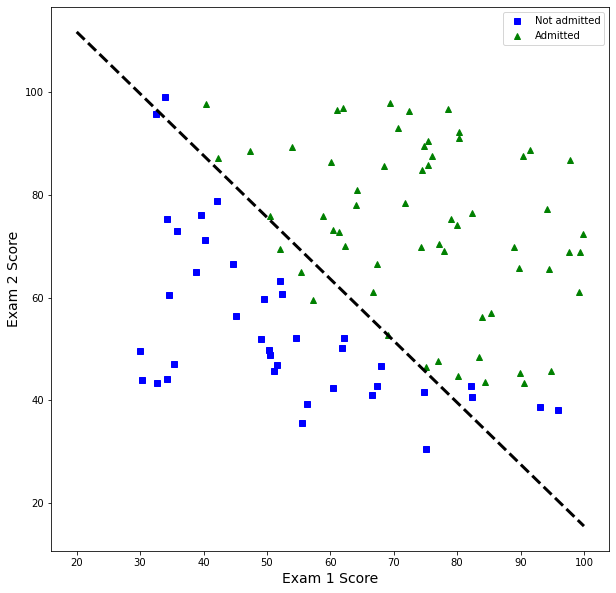

In [41]:
plt.figure(figsize=(10, 10))

# Plot the data for the “Not admitted” entries
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label = "Not admitted")
# Plot the data for the “Admitted” entries with the style of green triangles.

plt.plot(X[y==1, 0], X[y==1, 1], "g^", label = "Admitted")
plt.legend(loc="best")
# Add labels for the coordinates
plt.xlabel("Exam 1 Score", fontsize=14)
plt.ylabel("Exam 2 Score", fontsize=14)
left_right = np.array([20, 100])
# If you save your model to a variable other than “log_reg”,you need to update the following command accordingly.
boundary = -(log_reg.coef_[0][0] * left_right +
log_reg.intercept_[0]) / log_reg.coef_[0][1]
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.show()

* The decision boundary did not perfectly separate the admitted entries from the unadmitted entries. There is some overlap between the two classes, particularly in the region where the decision boundary crosses. This indicates that the logistic regression model did not achieve a perfect separation of the two classes based on the exam scores.

In [43]:
# Estimate admission probability for a student with Exam 1 score of 45 and Exam 2 score of 85
student_scores = np.array([[45, 85]])
admission_probability = log_reg.predict_proba(student_scores)

# Print out the admission probability
print("Student Admission Probability:", admission_probability[0][1])


Student Admission Probability: 0.653719360654885


In [46]:
# Predict admission for the test dataset
y_pred = log_reg.predict(X_test)

# Print out the prediction results
print("Prediction results of the test Dataset:")
print(y_pred)


Prediction results of the test Dataset:
[0 0 1 1 0 1 0 1 0 0 0 1 1 1 0 0 0 1 0 1]


In [49]:
# Get the model's score (accuracy)
model_score = log_reg.score(X_test, y_test)

# Print out the model's score
print("Score of the Model:", model_score)


Score of the Model: 0.85


In [50]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print out the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[10  2]
 [ 1  7]]


In [51]:
# Import necessary libraries
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate Precision
precision = precision_score(y_test, y_pred)

# Calculate Recall
recall = recall_score(y_test, y_pred)

# Calculate F1-Score
f1 = f1_score(y_test, y_pred)

# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)


Precision: 0.7777777777777778
Recall: 0.875
F1-Score: 0.823529411764706


**Answers**
* Precision: 0.7777777777777778
* Recall: 0.875
* F1-Score: 0.823529411764706

**Formulas**

* Precision (P): Precision = TP / (TP + FP)

* Recall (R): Recall = TP / (TP + FN)

* F1-Score (F1): F1 = 2 * (Precision * Recall) / (Precision + Recall)

**Performance Assessment:**
1. The model seems to work well, especially for university admissions. It's good at finding qualified students and avoids making too many mistakes.

**Linear Boundary Suitability:**

2. The straight line it draws to separate students into admitted and not admitted groups fits the data quite well. It's a reasonable choice based on how well it works.

**Performance Enhancement Strategies:**

3. To make it even better, we could try different methods and adjust a setting called 'C.' This would help balance the model's ability to find qualified students and avoid letting in too many unqualified ones.